<a href="https://colab.research.google.com/github/itsmekrish887/testrepo/blob/main/Pima_Indians_Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load dataset
df = pd.read_csv('/content/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
#get info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Total count: 768, Maximum Age: 41, Minimum Age: 21, Approximately 34.9% of individuals have diabetes (Outcome = 1).


In [7]:
df.shape

(768, 9)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values.

Normalize or Scale Data:

Normalize or scale features to bring them to a similar scale, especially for models sensitive to feature scales

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [10]:
df_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

Exploratory Data Analysis (EDA)

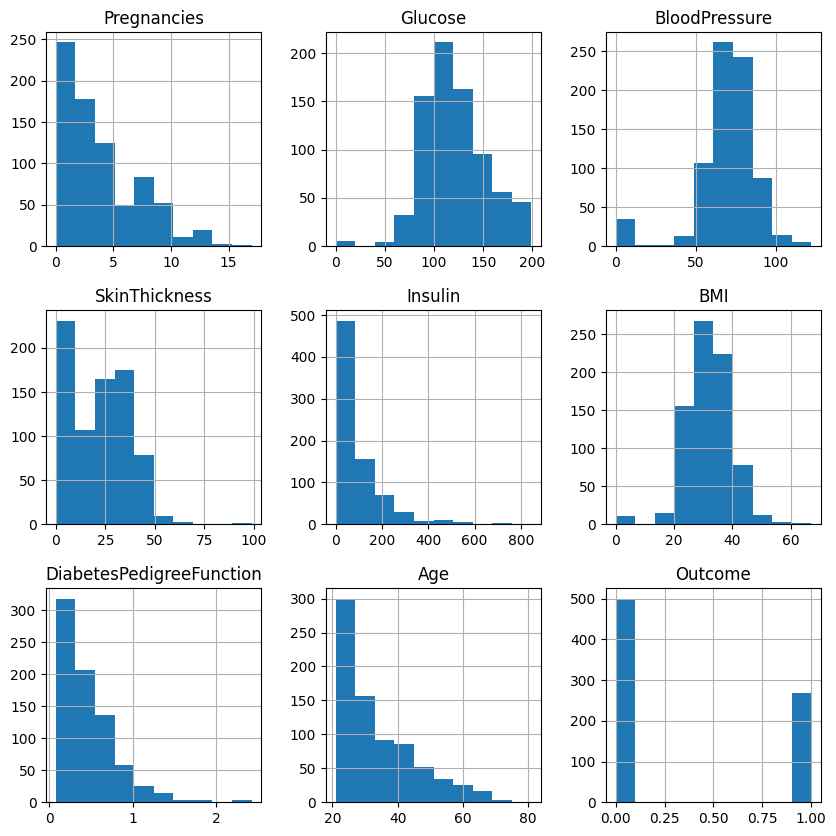

In [11]:
# Histograms for all features
df.hist(figsize=(10, 10))
plt.show()



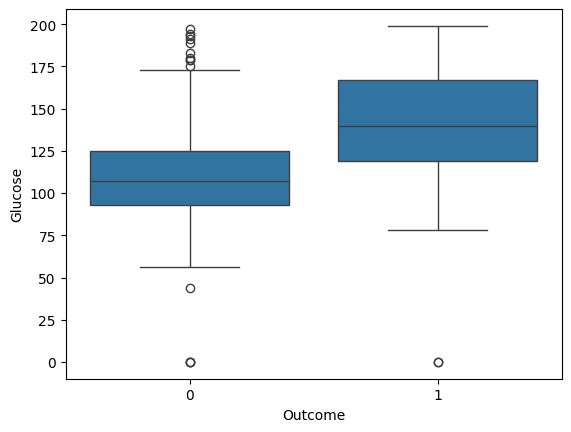

In [12]:
sns.boxplot(data=df, x='Outcome', y='Glucose')
plt.show()

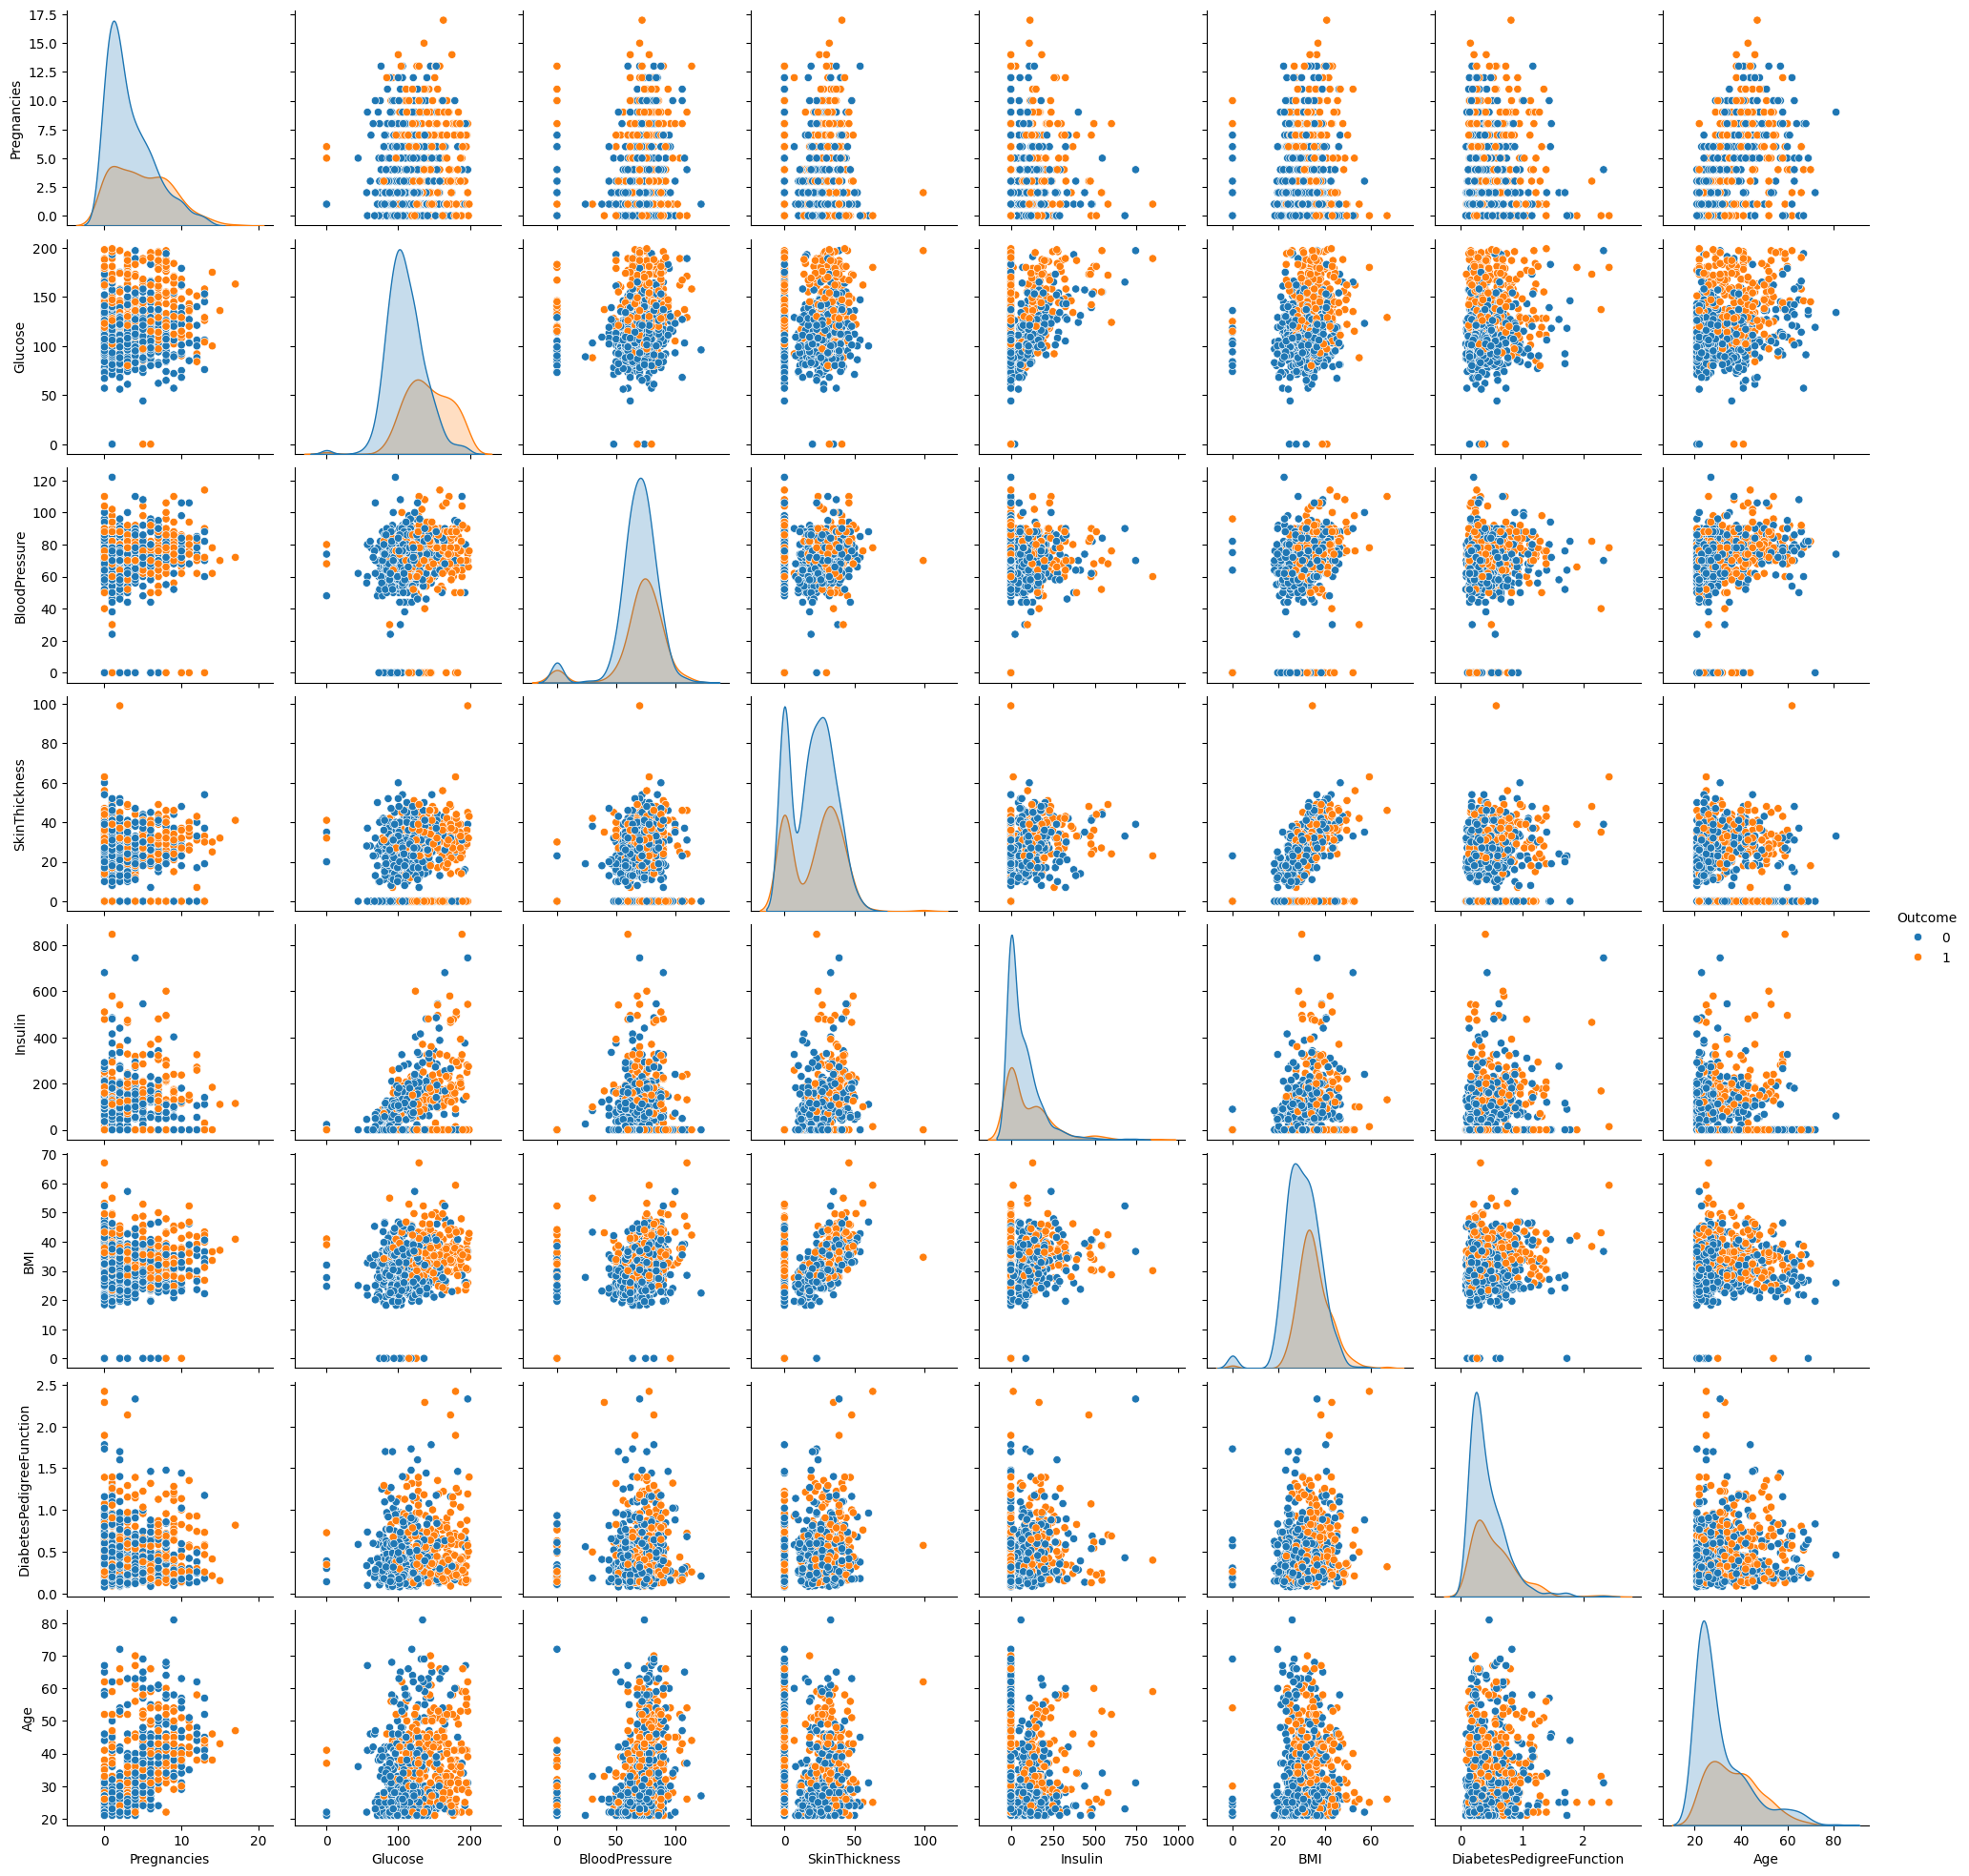

In [13]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='Outcome')
plt.show()




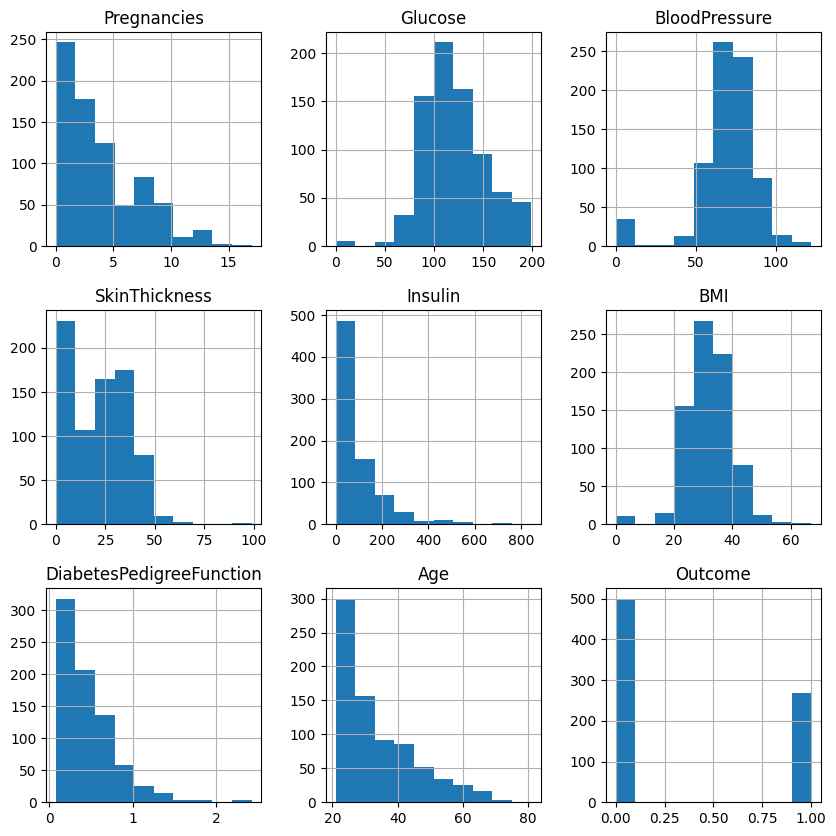

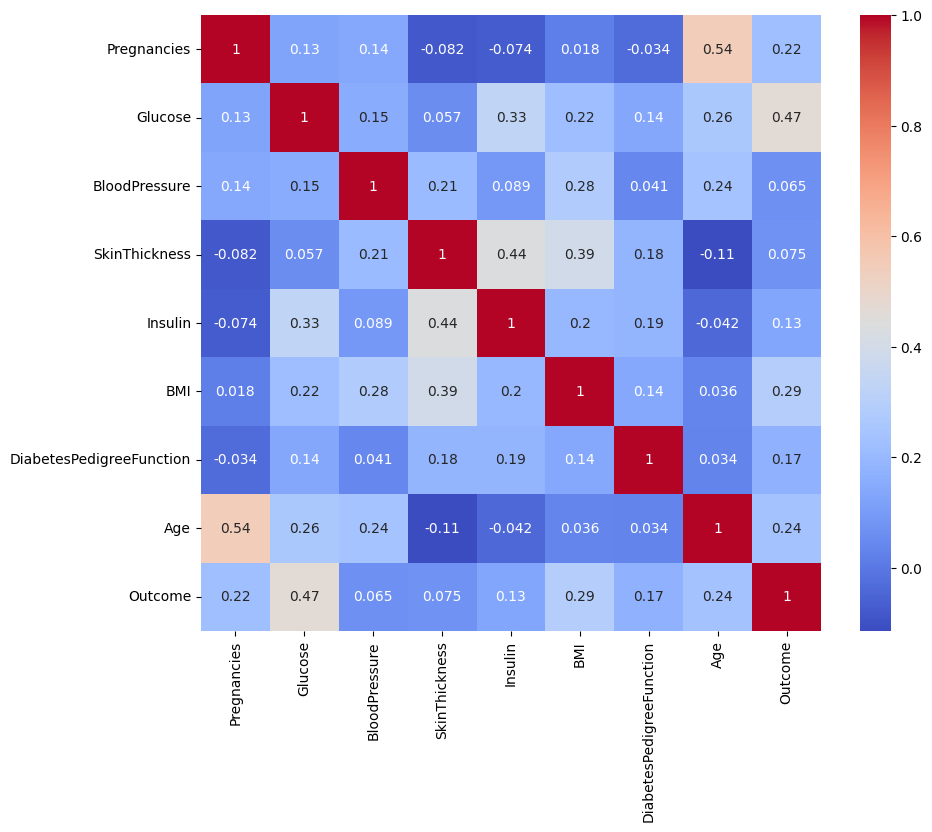

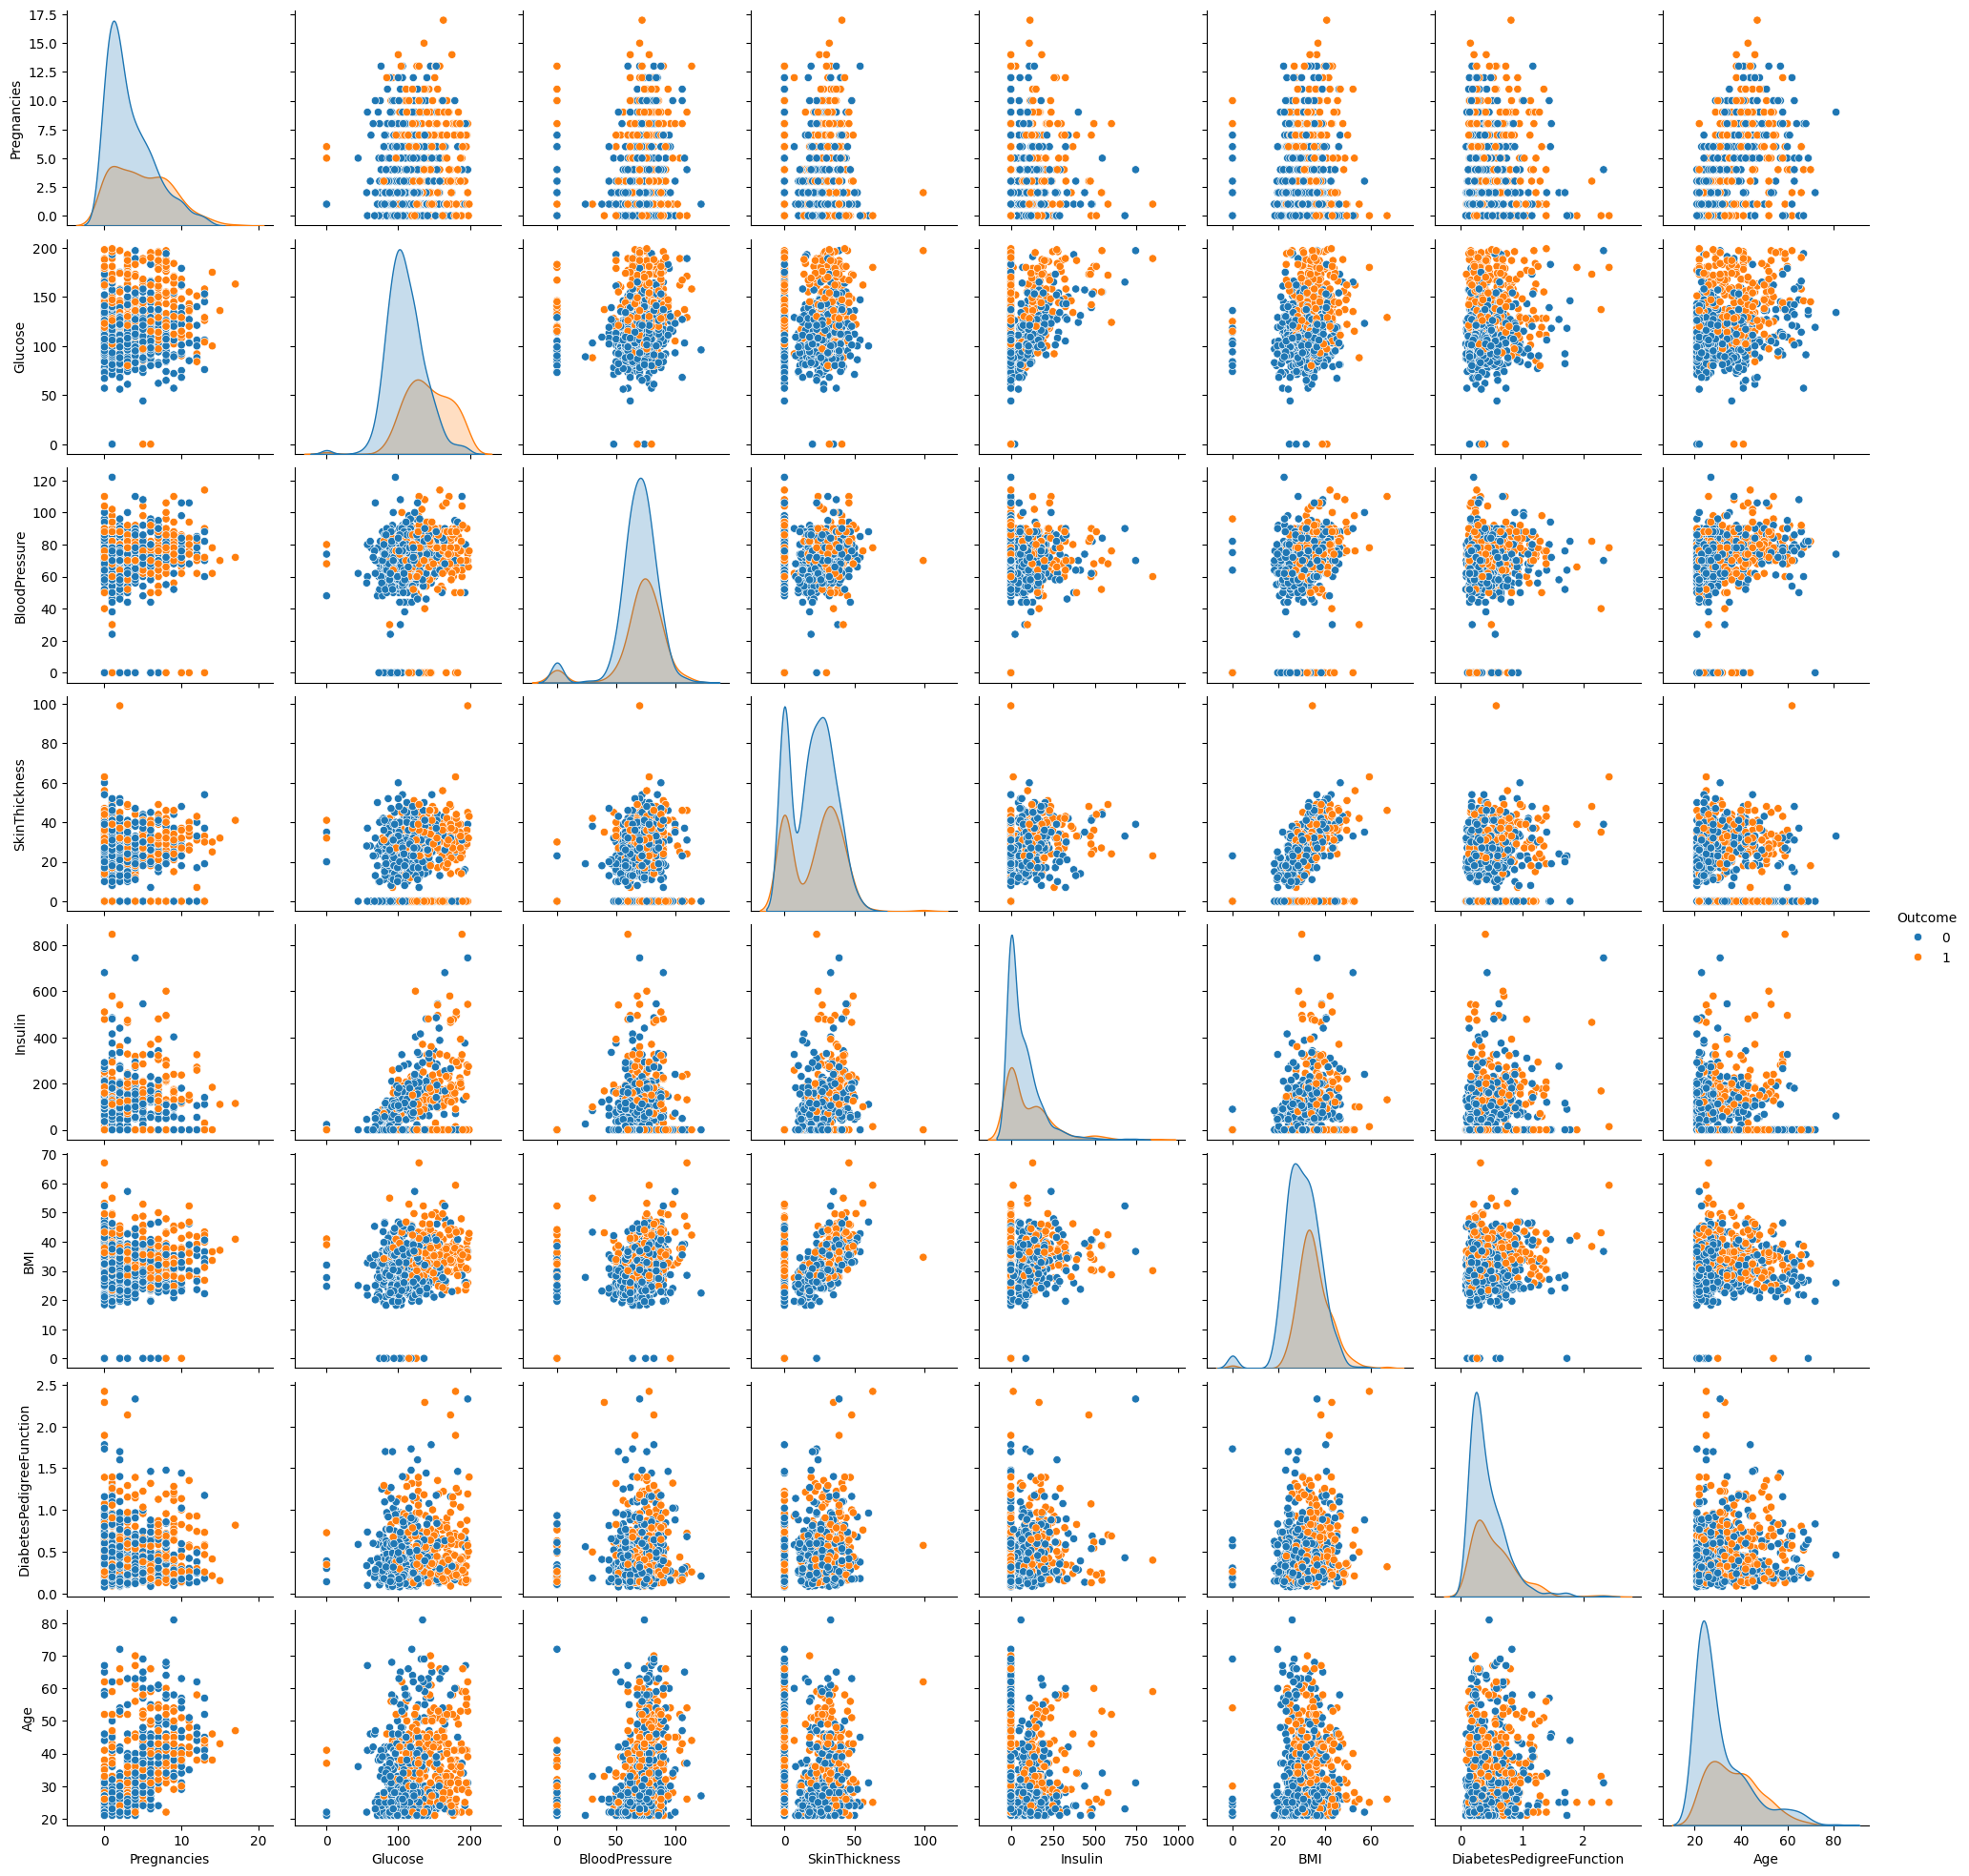

In [14]:
# Histograms
df.hist(bins=10, figsize=(10, 10))
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair Plots
sns.pairplot(df, hue='Outcome')
plt.show()

In [16]:
# Data Preprocessing
#Handle Outliers: Identify and handle outliers if necessary.
#Normalize/Scale Data: Scale the data to ensure all features contribute equally to the analysis.

In [17]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Outcome'] = df['Outcome']


Model Building
Train-Test Split: Split the data into training and testing sets.
Train Models: Train different models like Logistic Regression, Decision Trees, Random Forests, and SVM.
Evaluate Models: Evaluate the performance of the models using accuracy, precision, recall, and F1-score.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Train-Test Split
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

print("SVM:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

[[79 20]
 [18 37]]
Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154

[[74 25]
 [15 40]]
Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      

#General Insights:
Accuracy: All models have similar accuracy, around 0.73 to 0.75, indicating a similar overall performance.
Class Imbalance: The precision and recall for class 1 (Diabetes) are consistently lower across all models compared to class 0 (No Diabetes). This suggests that the models are better at predicting non-diabetic cases than diabetic cases.
#Logistic Regression vs. Decision Tree: Logistic Regression has a slightly higher precision for class 1 compared to Decision Tree but slightly lower recall. Decision Tree has a higher recall for class 1, suggesting it is slightly better at identifying diabetic cases but also has a higher false positive rate.
#Random Forest: This model has balanced performance but does not significantly outperform Logistic Regression or Decision Tree in terms of accuracy. It is, however, more robust due to the ensemble nature.
#SVM: SVM shows similar performance to the other models. It has the highest recall for class 0 (No Diabetes), indicating it is very good at identifying non-diabetic cases but has the lowest recall for class 1, indicating it misses more diabetic cases compared to other models.
#Conclusion:
###Logistic Regression: Provides a good balance between precision and recall, especially for class 1. It might be preferred if the focus is on maintaining a balance between identifying diabetic and non-diabetic cases.
###Decision Tree: May be preferred if the priority is to minimize missed diabetic cases (higher recall for class 1) even at the cost of more false positives.
###Random Forest: Offers robustness and slightly better performance due to averaging over multiple trees.
##SVM: Good at identifying non-diabetic cases but might not be the best choice if identifying diabetic cases is critical.
###Recommendations:
###Hyperparameter Tuning: Further tuning of hyperparameters might improve model performance.
###Feature Engineering: Investigate if additional features or transformations can improve predictive power.
###Class Imbalance Handling: Techniques such as oversampling the minority class or using weighted loss functions might help improve the recall for class 1 (Diabetes).







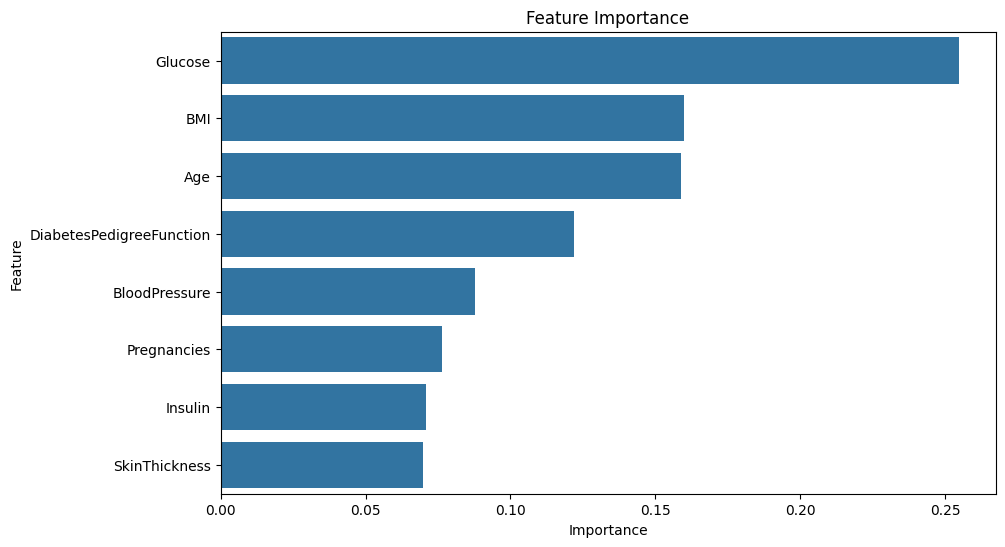

In [19]:
# Feature importance using Random Forest
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


